## 비지도 학습의 개요

비지도 학습(Unsupervised Learning)은 기계 학습의 일종으로, 데이터가 어떻게 구성되었는지를 알아내는 문제의 범주에 속한다. 
이 방법은 지도 학습(Supervised Learning) 혹은 강화 학습(Reinforcement Learning)과는 달리 **입력값에 대한 목표치가 주어지지 않는다**. (y값이 없다.)

- 차원 축소: PCA, LDA, SVD
- 군집화: KMeans Clustering, DBSCAN
- 군집화 평가

## 차원 축소

- feature의 갯수를 줄이는 것을 뛰어 넘어, 특징을 추출하는 역할을 하기도 함.
- 계산 비용을 감소하는 효과
- 전반적인 데이터에 대한 이해도를 높이는 효과

In [1]:
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
import pandas as pd

### 데이터 로드 (iris 데이터)

In [2]:
iris = datasets.load_iris()
data = iris['data']
df = pd.DataFrame(data, columns=iris['feature_names'])
df['target'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## PCA 차원축소

주성분 분석 (PCA) 는 선형 차원 축소 기법입니다. 매우 인기 있게 사용되는 차원 축소 기법중 하나입니다.

주요 특징중의 하나는 **분산(variance)을 최대한 보존**한다는 점입니다.

[PCA의 원리에 관련된 블로그글](https://excelsior-cjh.tistory.com/167)

- components에 1보다 작은 값을 넣으면, 분산을 기준으로 차원 축소
- components에 1보다 큰 값을 넣으면, 해당 값을 기준으로 feature를 축소

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components=2) #feature를 2개로 축소

In [6]:
data_scaled = StandardScaler().fit_transform(df.loc[:, 'sepal length (cm)': 'petal width (cm)'])

In [7]:
pca_data = pca.fit_transform(data_scaled)

In [8]:
data_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [9]:
pca_data[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [10]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

%matplotlib inline

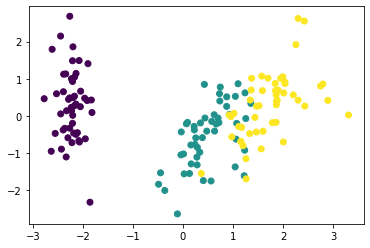

In [11]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['target'])

In [12]:
pca = PCA(n_components=0.99) # 얘는 분산 유지

In [13]:
pca_data = pca.fit_transform(data_scaled)

In [14]:
pca_data[:5]

array([[-2.26470281,  0.4800266 , -0.12770602],
       [-2.08096115, -0.67413356, -0.23460885],
       [-2.36422905, -0.34190802,  0.04420148],
       [-2.29938422, -0.59739451,  0.09129011],
       [-2.38984217,  0.64683538,  0.0157382 ]])

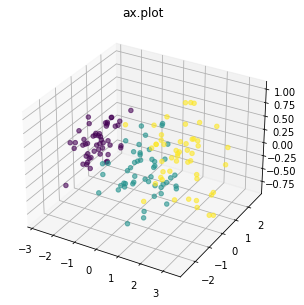

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D object

sample_size = 50
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], alpha=0.6, c=df['target'])
plt.savefig('./tmp.svg')
plt.title("ax.plot")
plt.show()